## MVA-MP1: Image Classification and Regression
**Hind DADOUN**

## 2- Getting Started

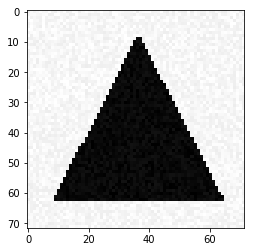

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

#Function for last question
def generate_dataset_classification1(nb_samples, noise=0.0, free_location=False,pair=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    X_noise = np.zeros([nb_samples,im_size])
    Y_noise = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        #if i % 10 == 0:
            #print(i)
        category = np.random.randint(3)
        np.random.seed(i)
        if category == 0:
            X[i] = generate_a_rectangle(0.0, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(0.0, free_location)
        else:
            [X[i], V] = generate_a_triangle(0.0, free_location)
        Y[i] = category
            
        if pair==True: 
                np.random.seed(i)
                if category == 0:
                    X_noise[i] = generate_a_rectangle(noise, free_location)
                elif category == 1: 
                    X_noise[i] = generate_a_disk(noise, free_location)
                else:
                    [X_noise[i], V_noise] = generate_a_triangle(noise, free_location)
                Y_noise[i] = category
    X = (X ) / (255 )            
    if pair==True: 
        X_noise = (X_noise + noise) / (255 + 2 * noise)
        res=[[X,Y],[X_noise,Y_noise]]
        return res
    else:    
        return [X, Y]

def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]


def generate_test_set_classification1(pair=False):
    np.random.seed(42)
    if pair==False: 
        [X_test, Y_test] = generate_dataset_classification1(300, 20, True)
        Y_test = np_utils.to_categorical(Y_test, 3) 
        return [X_test, Y_test]
    else: 
        [X_test, Y_test],[X_test_noise,Y_test_noise] = generate_dataset_classification1(300, 20, True,pair=True)
        Y_test = np_utils.to_categorical(Y_test, 3)
        Y_test_noise = np_utils.to_categorical(Y_test_noise, 3)
        
        return [[X_test, Y_test],[X_test_noise,Y_test_noise]]
        

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        #if i % 10 == 0:
         #   print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]



## 3- Simple Classification

In [52]:
import keras
from keras.layers import Dense
from keras.models import Sequential,Model
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import UpSampling2D, Input

In [53]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
[X_test, Y_test]=generate_test_set_classification()

Creating data:
Creating data:


In [54]:
#Hot-encodding
Y_train = np_utils.to_categorical(Y_train, 3)

In [56]:
#Creating a model with the sgd optimizer
model = Sequential()
model.add(Dense(32,activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(3, activation = 'softmax'))
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics =['accuracy'])
model.fit(X_train, Y_train, epochs = 100, validation_data=(X_test,Y_test));

Train on 300 samples, validate on 300 samples
Epoch 1/100
300/300 [==============================] - 2s 5ms/step - loss: 1.8766 - acc: 0.2800 - val_loss: 1.0975 - val_acc: 0.3567
Epoch 2/100
300/300 [==============================] - 0s 361us/step - loss: 1.1000 - acc: 0.2667 - val_loss: 1.0970 - val_acc: 0.3300
Epoch 3/100
300/300 [==============================] - 0s 381us/step - loss: 1.0983 - acc: 0.3533 - val_loss: 1.0970 - val_acc: 0.3300
Epoch 4/100
300/300 [==============================] - 0s 377us/step - loss: 1.0982 - acc: 0.3533 - val_loss: 1.0970 - val_acc: 0.3300
Epoch 5/100
300/300 [==============================] - 0s 360us/step - loss: 1.0981 - acc: 0.3033 - val_loss: 1.0970 - val_acc: 0.3300
Epoch 6/100
300/300 [==============================] - 0s 373us/step - loss: 1.0980 - acc: 0.3533 - val_loss: 1.0970 - val_acc: 0.3300
Epoch 7/100
300/300 [==============================] - 0s 380us/step - loss: 1.0980 - acc: 0.3533 - val_loss: 1.0970 - val_acc: 0.3300
Epoch 8/100

In [57]:
# Creating a model with the adam optimizer :
model1 = Sequential()
model1.add(Dense(32,activation = 'relu', input_shape = (X_train.shape[1],)))
model1.add(Dense(3, activation = 'softmax'))
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics =['accuracy'])
model1.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_data=(X_test,Y_test))

Train on 300 samples, validate on 300 samples
Epoch 1/100
300/300 [==============================] - 2s 5ms/step - loss: 1.7976 - acc: 0.4433 - val_loss: 1.5608 - val_acc: 0.3367
Epoch 2/100
300/300 [==============================] - 0s 433us/step - loss: 0.6406 - acc: 0.6533 - val_loss: 1.6154 - val_acc: 0.3233
Epoch 3/100
300/300 [==============================] - 0s 424us/step - loss: 0.4470 - acc: 0.8300 - val_loss: 1.8953 - val_acc: 0.3367
Epoch 4/100
300/300 [==============================] - 0s 431us/step - loss: 0.3599 - acc: 0.8967 - val_loss: 1.9518 - val_acc: 0.2967
Epoch 5/100
300/300 [==============================] - 0s 471us/step - loss: 0.3584 - acc: 0.8367 - val_loss: 2.4636 - val_acc: 0.3900
Epoch 6/100
300/300 [==============================] - 0s 538us/step - loss: 0.2912 - acc: 0.9300 - val_loss: 2.1635 - val_acc: 0.3467
Epoch 7/100
300/300 [==============================] - 0s 663us/step - loss: 0.2601 - acc: 0.9267 - val_loss: 2.5947 - val_acc: 0.3900
Epoch 8/100

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 32)                165920    
_________________________________________________________________
dense_56 (Dense)             (None, 3)                 99        
Total params: 166,019
Trainable params: 166,019
Non-trainable params: 0
_________________________________________________________________


In [59]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
print('category of X with sgd:',np.argmax(model.predict(X_test))+1)
print('category of X with adam:',np.argmax(model1.predict(X_test))+1)

category of X with sgd: 2
category of X with adam: 2


## 4- Visualization of the Solution


**We would like to visualize the weights of the linear classifier. Check the output of the function 
model.get_weights(): The first part corresponds to the matrix of the classifier. Its columns have
the same size as the input images, because Keras uses vector-matrix multiplications instead of matrixvector
multiplications. Visualize the 3 columns as images**

In [60]:
#Let's check the shapes
print(model.get_weights()[0].shape)
print('biases',model.get_weights()[1].shape)
print(model.get_weights()[2].shape)
print('biases',model.get_weights()[3].shape)
#Let's vizualize the weights for the model with adam optimizer 
column1=model1.get_weights()[0]
column2=model1.get_weights()[2]
image=column1.dot(column2)


(5184, 32)
biases (32,)
(32, 3)
biases (3,)


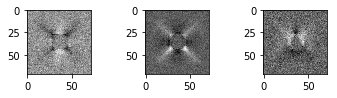

In [61]:
plt.subplot(331)
plt.imshow(image[:,0].reshape(72,72), cmap='gray')
plt.subplot(332)
plt.imshow(image[:,1].reshape(72,72), cmap='gray')
plt.subplot(333)
plt.imshow(image[:,2].reshape(72,72), cmap='gray')

## 5- A More Difficult Classification Problem

In [62]:
[X_train_n, Y_train_n] = generate_dataset_classification(300, 20, True)
[X_test_n, Y_test_n] = generate_test_set_classification()
Y_train_n = np_utils.to_categorical(Y_train_n, 3)

Creating data:
Creating data:


In [63]:
print(X_train_n.shape)

(300, 5184)


In [64]:
model1.fit(X_train_n, Y_train_n, batch_size = 32, epochs = 100, validation_data = (X_test_n,Y_test_n))
score = model1.evaluate(X_test_n, Y_test_n)

Train on 300 samples, validate on 300 samples
Epoch 1/100
300/300 [==============================] - 0s 235us/step - loss: 4.8926 - acc: 0.3833 - val_loss: 2.9791 - val_acc: 0.3467
Epoch 2/100
300/300 [==============================] - 0s 223us/step - loss: 1.3926 - acc: 0.3167 - val_loss: 1.0986 - val_acc: 0.3400
Epoch 3/100
300/300 [==============================] - 0s 196us/step - loss: 1.0988 - acc: 0.2833 - val_loss: 1.0986 - val_acc: 0.3300
Epoch 4/100
300/300 [==============================] - 0s 251us/step - loss: 1.0984 - acc: 0.3667 - val_loss: 1.0987 - val_acc: 0.3300
Epoch 5/100
300/300 [==============================] - 0s 375us/step - loss: 1.0982 - acc: 0.3667 - val_loss: 1.0988 - val_acc: 0.3300
Epoch 6/100
300/300 [==============================] - 0s 398us/step - loss: 1.0979 - acc: 0.3667 - val_loss: 1.0988 - val_acc: 0.3300
Epoch 7/100
300/300 [==============================] - 0s 432us/step - loss: 1.0977 - acc: 0.3667 - val_loss: 1.0990 - val_acc: 0.3300
Epoch 8/1

In [65]:
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D,Activation
from keras.layers import Dropout
from keras.layers import Flatten

In [66]:
model2 = Sequential()
model2.add(Conv2D(16,(5,5), activation='relu', input_shape=(72,72,1))) #filters
model2.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(3))
model2.add(Activation('softmax'))

In [67]:
#Reshape Input
X_train_n = X_train_n.reshape(X_train_n.shape[0], 72, 72, -1)
X_train_n = X_train_n.astype('float32')
print(X_train_n.shape)
X_test_n = X_test_n.reshape(X_test_n.shape[0], 72, 72, -1)
X_test_n = X_test_n.astype('float32')

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train_n, Y_train_n, batch_size = 32, epochs = 50, validation_data = (X_test_n,Y_test_n))
score2 = model2.evaluate(X_test_n, Y_test_n)

(300, 72, 72, 1)
Train on 300 samples, validate on 300 samples
Epoch 1/50
300/300 [==============================] - 3s 10ms/step - loss: 1.2312 - acc: 0.3800 - val_loss: 0.9830 - val_acc: 0.5533
Epoch 2/50
300/300 [==============================] - 2s 5ms/step - loss: 0.9154 - acc: 0.5700 - val_loss: 0.9010 - val_acc: 0.6033
Epoch 3/50
300/300 [==============================] - 1s 5ms/step - loss: 0.7601 - acc: 0.6933 - val_loss: 0.8117 - val_acc: 0.6233
Epoch 4/50
300/300 [==============================] - 1s 4ms/step - loss: 0.5935 - acc: 0.7600 - val_loss: 0.7164 - val_acc: 0.6900
Epoch 5/50
300/300 [==============================] - 1s 5ms/step - loss: 0.4541 - acc: 0.8233 - val_loss: 0.7020 - val_acc: 0.7067
Epoch 6/50
300/300 [==============================] - 2s 5ms/step - loss: 0.3518 - acc: 0.8933 - val_loss: 0.6934 - val_acc: 0.6867
Epoch 7/50
300/300 [==============================] - 1s 5ms/step - loss: 0.2720 - acc: 0.9200 - val_loss: 0.7145 - val_acc: 0.7200
Epoch 8/50
3

In [68]:
eval=model2.evaluate(X_test_n, Y_test_n)

300/300 [==============================] - 0s 1ms/step


**What is the value of the loss function on this test set when using your deep network?**


In [70]:
print('loss function:',eval[0])

loss function: 1.1915542888641357


## 6- A Regression Problem

Creating data:


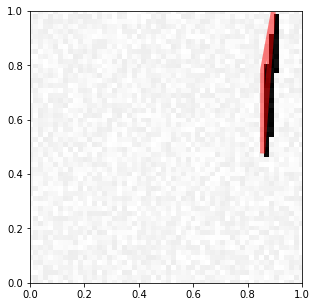

In [71]:
[X_train_b, Y_train_b] = generate_dataset_regression(300, 20)
visualize_prediction(X_train_b[0], Y_train_b[0])

In [72]:
[X_test_b, Y_test_b] = generate_test_set_regression()


Creating data:


In [73]:
X_train_b = X_train_b.reshape(X_train_b.shape[0], 72, 72, 1)
# X_train_b = X_train_b.astype('float32')
X_test_b = X_test_b.reshape(X_test_b.shape[0], 72, 72, 1)
# X_test_b = X_test_b.astype('float32')


In [74]:
from keras import optimizers

model3 = Sequential()
model3.add(Conv2D(32, activation='relu', input_shape=(72,72,1), kernel_size=(5,5), padding="same"))
model3.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model3.add(Conv2D(32, (5,5), activation="relu", padding="same"))
model3.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dropout(0.5))


model3.add(Dense(128, activation='relu'))
model3.add(Dense(6))

checkpoint =keras.callbacks.ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model3.fit(X_train_b, Y_train_b, batch_size = 8, epochs = 20,shuffle=True, validation_data =(X_test_b,Y_test_b),callbacks=[checkpoint])

score3 = model3.evaluate(X_test_b, Y_test_b);

Train on 300 samples, validate on 300 samples
Epoch 1/20
300/300 [==============================] - 7s 23ms/step - loss: 0.1660 - acc: 0.1567 - val_loss: 0.1255 - val_acc: 0.1633

Epoch 00001: val_loss improved from inf to 0.12550, saving model to model-001.h5
Epoch 2/20
300/300 [==============================] - 5s 18ms/step - loss: 0.1113 - acc: 0.1500 - val_loss: 0.0899 - val_acc: 0.1367

Epoch 00002: val_loss improved from 0.12550 to 0.08990, saving model to model-002.h5
Epoch 3/20
300/300 [==============================] - 5s 18ms/step - loss: 0.0977 - acc: 0.1400 - val_loss: 0.0864 - val_acc: 0.1700

Epoch 00003: val_loss improved from 0.08990 to 0.08642, saving model to model-003.h5
Epoch 4/20
300/300 [==============================] - 6s 19ms/step - loss: 0.0894 - acc: 0.2167 - val_loss: 0.0729 - val_acc: 0.2333

Epoch 00004: val_loss improved from 0.08642 to 0.07289, saving model to model-004.h5
Epoch 5/20
300/300 [==============================] - 6s 20ms/step - loss: 0.0837 

In [75]:
print(score3)

[0.06185956368843715, 0.21333333373069763]


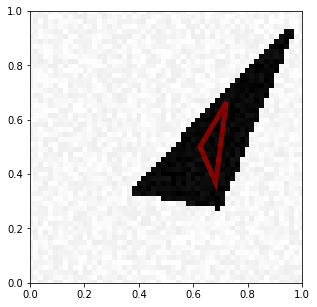

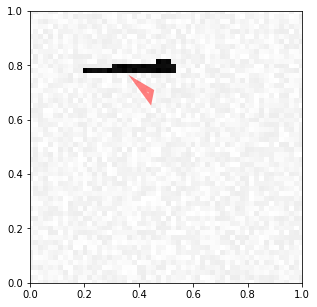

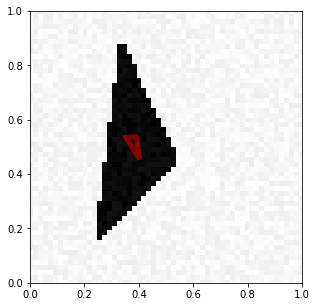

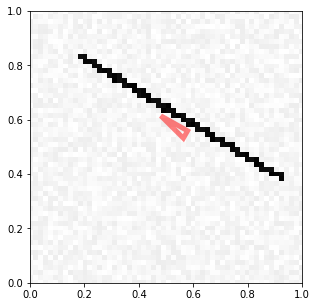

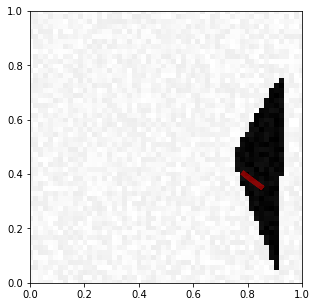

In [76]:
pred=model3.predict(X_test_b)
for i in range(5):
    visualize_prediction(X_test_b[i], pred[i])

## 7 Image Denoising

In [77]:
[X_train, Y_train],[X_train_noise,Y_train_noise]=generate_dataset_classification1(300, 20,pair=True)
[X_test, Y_test],[X_test_noise,Y_test_noise]=generate_test_set_classification1(pair=True)

Creating data:
Creating data:


In [80]:
input_img = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), padding='same', activation="sigmoid")(x)

model = Model(input_img, decoded)

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(
    np.reshape(X_train, (X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)),
    np.reshape(X_train_noise, (X_train_noise.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)),
    epochs=3,
    batch_size=64,
    validation_split=0.3
);

Train on 210 samples, validate on 90 samples
Epoch 1/3
210/210 [==============================] - 6s 30ms/step - loss: 0.2046 - val_loss: 0.1551
Epoch 2/3
210/210 [==============================] - 4s 21ms/step - loss: 0.1405 - val_loss: 0.1040
Epoch 3/3
210/210 [==============================] - 5s 22ms/step - loss: 0.0955 - val_loss: 0.0651


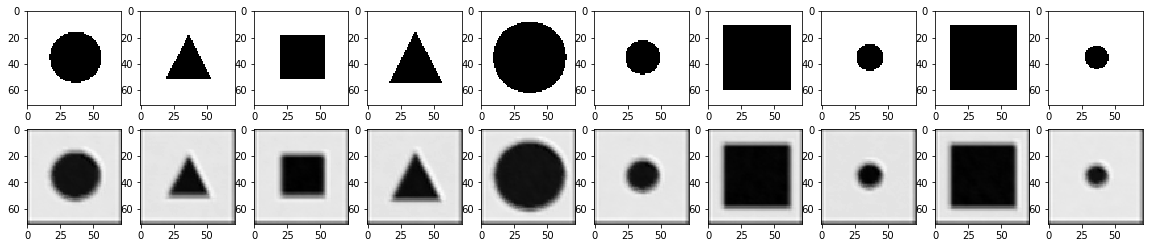

In [81]:
n = 10
decoded_imgs = model.predict(np.reshape(X_train_noise[:n], (n, IMAGE_SIZE, IMAGE_SIZE, 1)))

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train[i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap="gray")
     # reconstructed images 
    ax = plt.subplot(2, n, n + i + 1)
    plt.imshow(decoded_imgs[i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap="gray")

plt.show()